In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'
df = pd.read_csv(url)
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [3]:
df = df.set_index('Serial No.')
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
df.shape

(500, 8)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df_unique = {}
for col in df:
  df_unique.update({col:df[col].nunique()})
  
df_unique = pd.DataFrame(df_unique, index = ['Unique Values']).T
df_unique

,Unique Values
GRE Score,49
TOEFL Score,29
University Rating,5
SOP,9
LOR,9
CGPA,184
Research,2
Chance of Admit,61


In [9]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,


In [10]:
df.duplicated().sum()

0

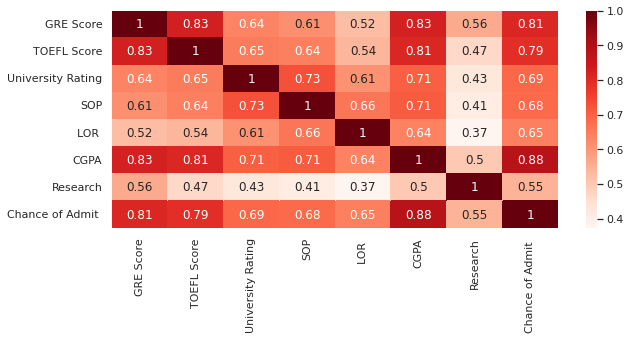

In [11]:
df_corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(df_corr, annot=True, cmap='Reds')
plt.show()

- CGPA shares high correlation with TOEFL and GRE Score
- Chance of Admit shares a high correlation with CGPA, TOFEL and GRE
- Fairly high correlation can be seen between SOP and University Rating
- Fairly high correlation can be seen between SOP and CGPA

In [12]:
# sns.pairplot(df)
# plt.show()

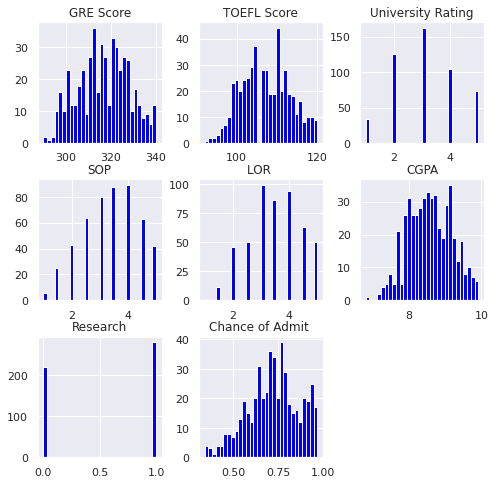

In [13]:
df.hist(color='blue', figsize=(8,8), bins=30)
plt.show()

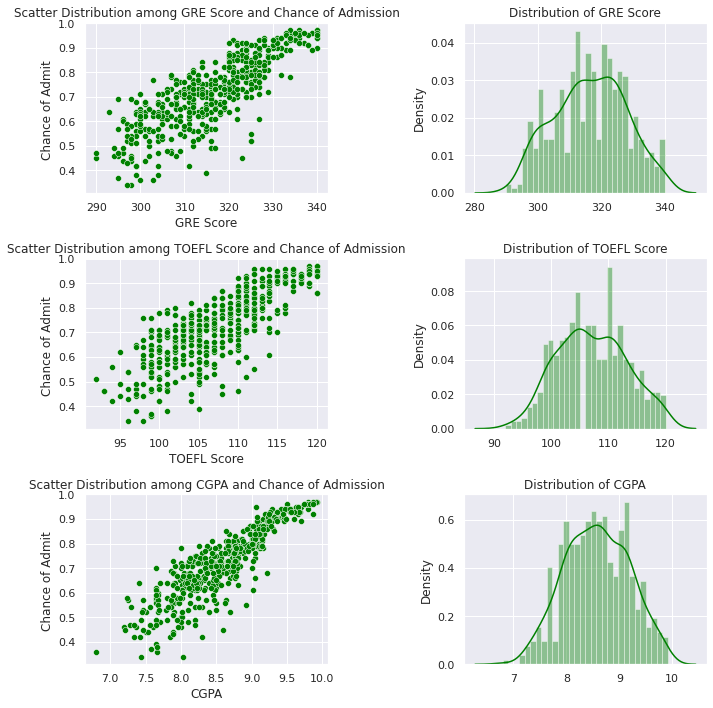

In [14]:
# Graphs of TOEFL, GRE and CGPA
fig = plt.figure(figsize=(10,10))
lst = ['GRE Score', 'TOEFL Score', 'CGPA']
i = 0
for col in lst:
  i += 1
  ax = fig.add_subplot(3, 2, i)
  sns.scatterplot(data=df, x=col, y='Chance of Admit ', color='green')
  plt.title(f'Scatter Distribution among {col} and Chance of Admission')

  i += 1
  ax = fig.add_subplot(3, 2, i)
  sns.distplot(x=df[col], color='green', bins=30)
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

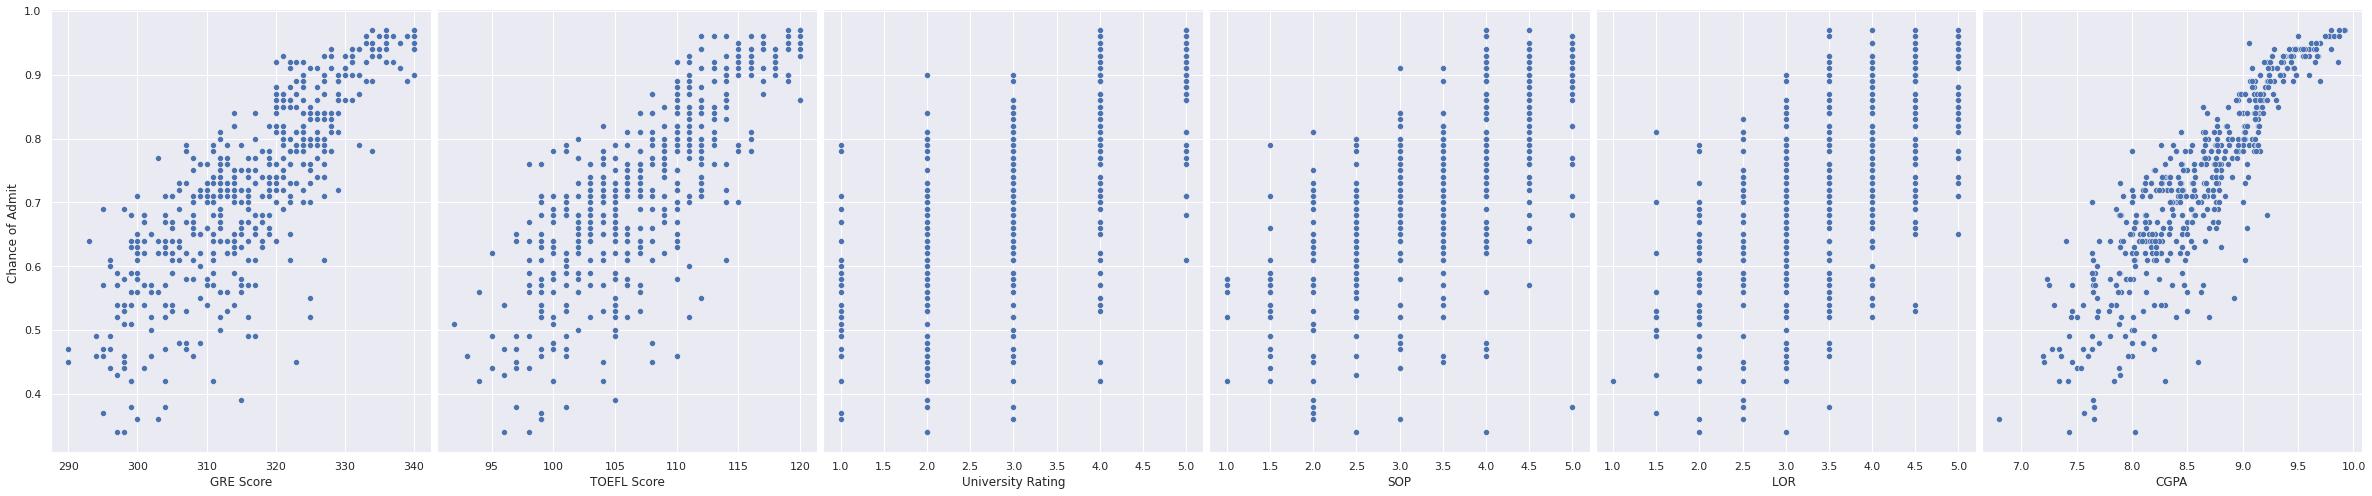

In [15]:
sns.pairplot(df, x_vars=['GRE Score','TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA'], y_vars='Chance of Admit ', size=7, aspect=0.8)
plt.show()

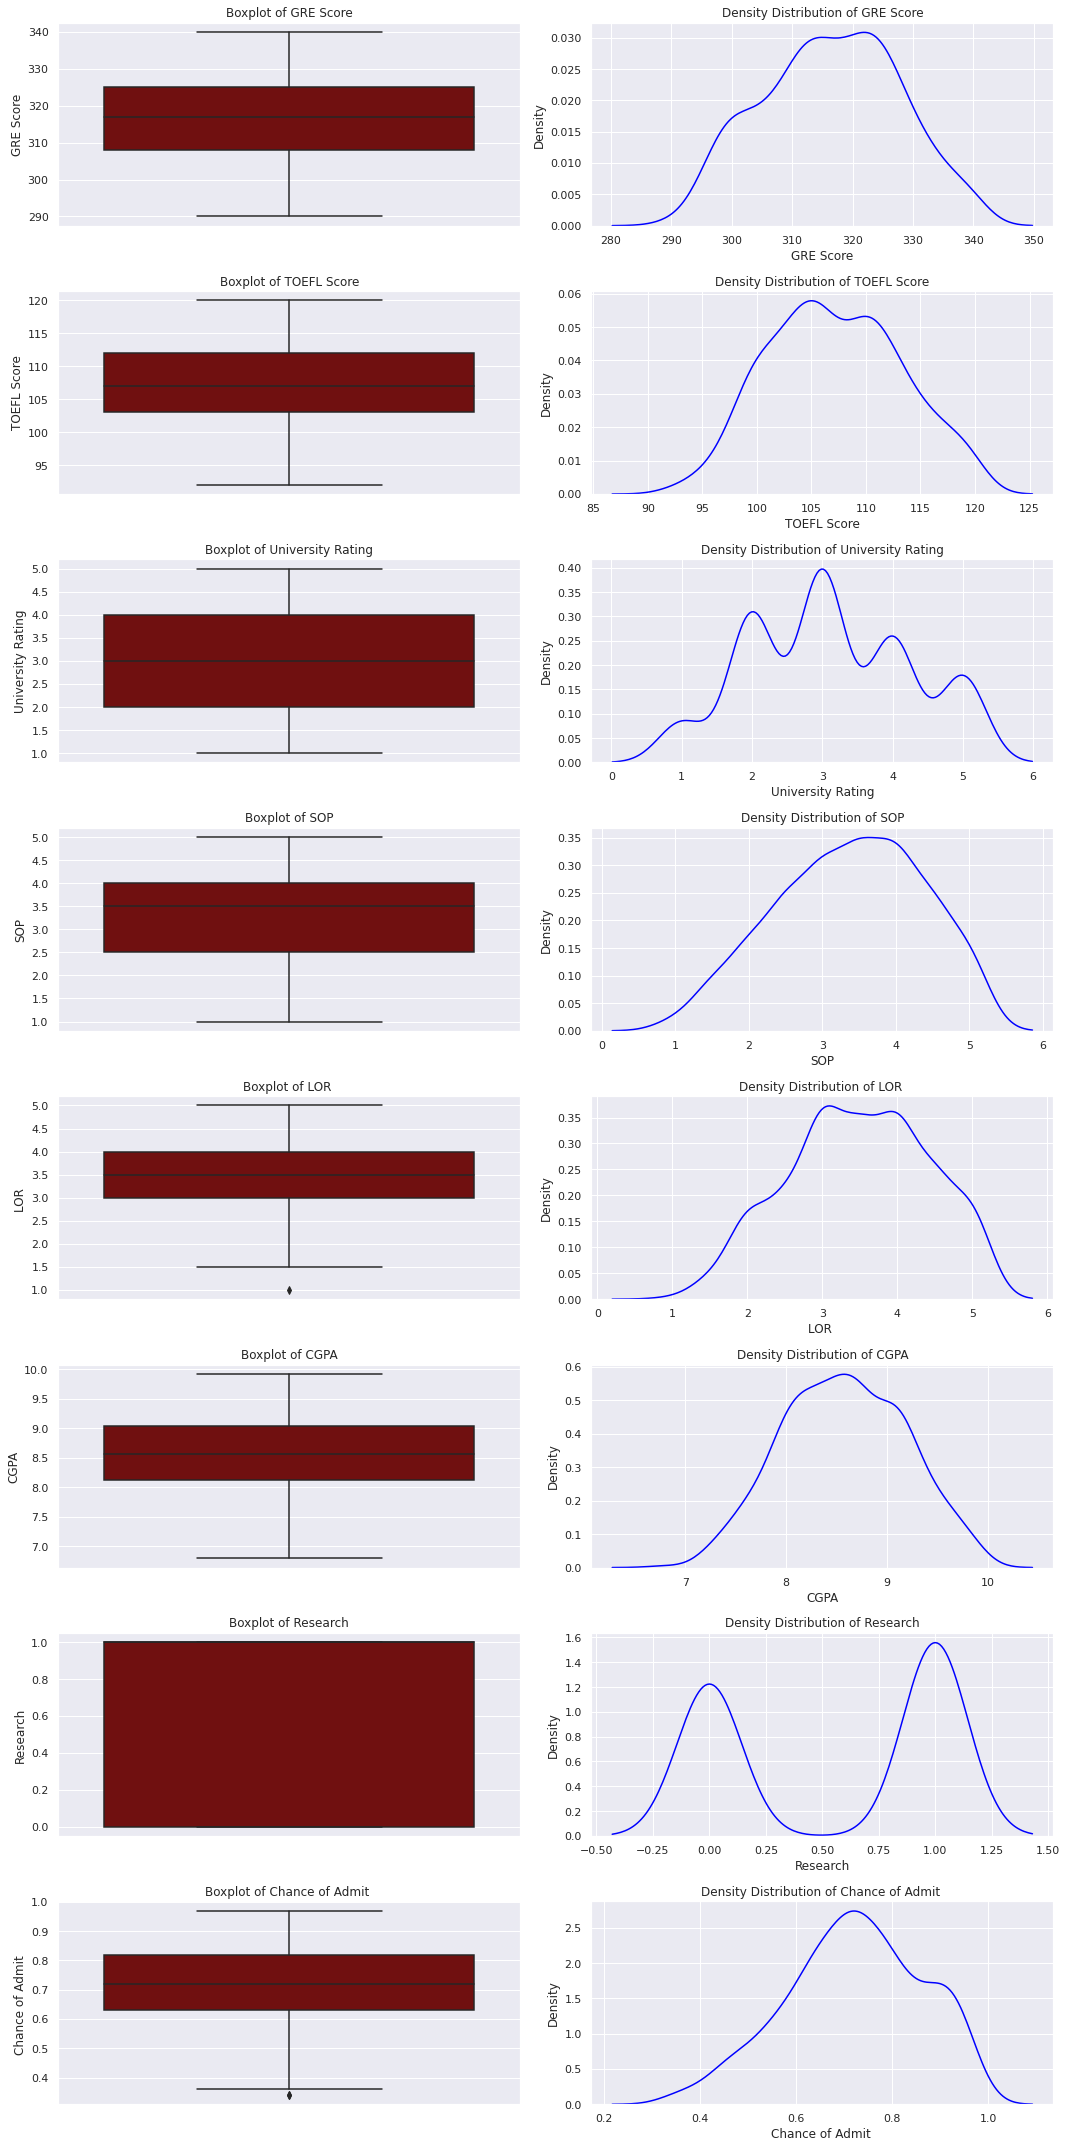

In [16]:
# Outlier Detection
plt.figure(figsize=(15,30))
i = 0
for col in df:
  i += 1
  plt.subplot(8, 2, i)
  sns.boxplot(y=df[col], color='maroon')
  plt.title(f'Boxplot of {col}')
  i += 1
  plt.subplot(8, 2, i)
  sns.kdeplot(x=df[col], color='blue')
  plt.title(f'Density Distribution of {col}')
plt.tight_layout()
plt.show()

# Linear Regression

In [17]:
X = df[df.columns.drop('Chance of Admit ')]
Y = df['Chance of Admit ']

In [18]:
import statsmodels.api as sm 
# statsmodels default is whitout intercept, to add intercept we need to add constant
X_sm = sm.add_constant(X)

sm_model = sm.OLS(Y, X_sm).fit()

In [19]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          8.21e-180
Time:                        14:18:33   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

In [20]:
# We will be dropping the SOP & University Rating feature as the p-value in OLS is greater than 0.05

In [21]:
X = df[df.columns.drop(['Chance of Admit ', 'LOR ', 'SOP', 'Research'])]
Y = df['Chance of Admit ']

In [22]:
scale = StandardScaler()
scale.fit(X)
x = scale.transform(X)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x, Y, test_size=0.2)

In [24]:
# calling the linear regression function
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
print(f'The coefficient: {li_reg.coef_}\n')
print(f'The intercept: {li_reg.intercept_}')

The coefficient: [0.02624607 0.01626645 0.01281202 0.08075791]

The intercept: 0.7226363614275092


In [26]:
y_pred = li_reg.predict(x_test)

In [27]:
print('The score of Linear Regression for Training Data:',li_reg.score(x_train,y_train))
print('The score of Linear Regression for Test Data:',li_reg.score(x_test,y_test))
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_pred)) # defailt squared =True
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False))
print('R^2:',r2_score(y_test,y_pred))
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_pred)))*(len(Y)-1)/(len(Y)-x.shape[1]-1)))

The score of Linear Regression for Training Data: 0.8245905706346528
The score of Linear Regression for Test Data: 0.7457571922374957
Mean Absolute error: 0.0461283666848314
Root Mean Squared Error: 0.07075515942476135
R^2: 0.7457571922374957
Adjusted R^2:  0.7437027049020412


{'1': 'GRE score', '2': 'TOEFL score', '3': 'University Rating', '4': 'CGPA'}


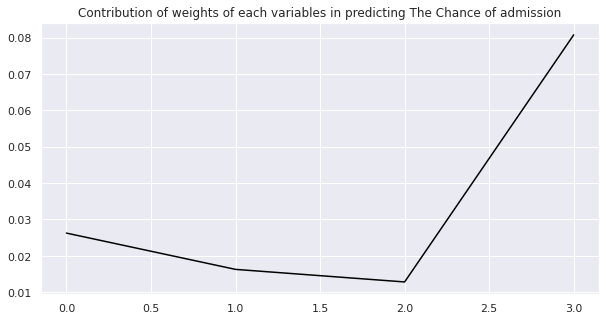

In [28]:
# Contribution of weights of each variables in predicting The Chance of admission
plt.figure(figsize=(10,5))
plt.plot(li_reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting The Chance of admission')
print({'1':'GRE score','2':'TOEFL score','3':'University Rating','4':'CGPA'})
plt.show()

# REGULARIZATION(L2) - RIDGE REGRESSION

In [29]:
# Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.
reg = Ridge(alpha=0)
reg.fit(x_train,y_train)
reg.coef_

array([0.02624607, 0.01626645, 0.01281202, 0.08075791])

- if α = 0:
  - The objective becomes same as simple linear regression.
  - Coefficeints will be the same coefficients as simple linear regression

In [30]:
reg = Ridge(alpha=1)
reg.fit(x_train,y_train)
reg.coef_

array([0.02644323, 0.01649542, 0.01297073, 0.08010421])

In [31]:
reg = Ridge(alpha=2)
reg.fit(x_train,y_train)
reg.coef_

array([0.02663221, 0.01671817, 0.01312515, 0.07946837])

 if 0 < α < ∞:
  - The magnitude of α will decide the weightage given to different parts of objective.
  - The coefficients will be somewhere between 0 and ones for simple linear regression.
Will work with aplha = 3

In [32]:
reg = Ridge(alpha=3)
reg.fit(x_train,y_train)

Ridge(alpha=3)

In [33]:
print('Coefficients:',reg.coef_)
print('Intercept:',reg.intercept_)

Coefficients: [0.02681343 0.01693492 0.01327544 0.07884964]
Intercept: 0.722664283244817


In [34]:
reg_pred = reg.predict(x_test)

In [35]:
# Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Ridge Regression
print('The score of Ridge Regression for Training Data:',reg.score(x_train,y_train),'.')
print('The score of Ridge Regression for Test Data:',reg.score(x_test,y_test),'.')
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=reg_pred),'.') # defailt squared =True
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False),'.')
print('R^2:',r2_score(y_test,reg_pred),'.')
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,reg_pred)))*(len(Y)-1)/(len(Y)-x.shape[1]-1)),'.')

The score of Ridge Regression for Training Data: 0.8245461949144458 .
The score of Ridge Regression for Test Data: 0.7458958094412238 .
Mean Absolute error: 0.046029907739622324 .
Root Mean Squared Error: 0.07073586837843271 .
R^2: 0.7458958094412238 .
Adjusted R^2:  0.7438424422447892 .


{'1': 'GRE score', '2': 'TOEFL score', '3': 'University Rating', '4': 'CGPA'}


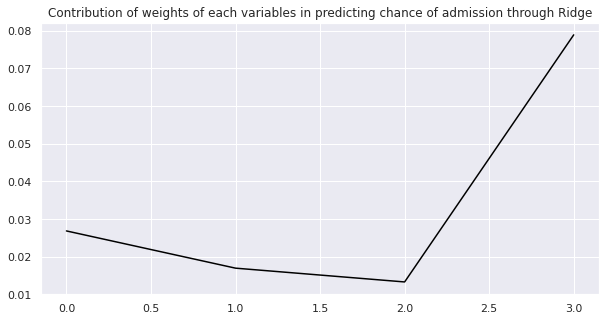

In [36]:
plt.figure(figsize=(10,5))
plt.plot(reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Ridge')
print({'1':'GRE score','2':'TOEFL score','3':'University Rating','4':'CGPA'})
plt.show()

- Observations:
  - CGPA claims the highest Weightage in coeffieints among all variable during Ridge Regression.

# REGULARIZATION(L1) - LASSO REGRESSION

In [37]:
laso = Lasso(alpha=0.000001)
laso.fit(x_train,y_train)

Lasso(alpha=1e-06)

In [38]:
print('Coefficients:',laso.coef_)
print('Intercept:',laso.intercept_)

Coefficients: [0.02624829 0.01626599 0.01281124 0.080756  ]
Intercept: 0.7226363153971703


In [39]:
laso_pred = laso.predict(x_test)

In [40]:
# Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression
print('The score of Lasso Regression for Training Data:',laso.score(x_train,y_train),'.')
print('The score of Lasso Regression for Test Data:',laso.score(x_test,y_test),'.')
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=laso_pred),'.') # defailt squared =True
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=laso_pred,squared=False),'.')
print('R^2:',r2_score(y_test,laso_pred),'.')
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,laso_pred)))*(len(Y)-1)/(len(Y)-x.shape[1]-1)),'.')

The score of Lasso Regression for Training Data: 0.8245905705085487 .
The score of Lasso Regression for Test Data: 0.7457570232391594 .
Mean Absolute error: 0.046128452483020686 .
Root Mean Squared Error: 0.07075518294067189 .
R^2: 0.7457570232391594 .
Adjusted R^2:  0.7437025345380617 .


{'1': 'GRE score', '2': 'TOEFL score', '3': 'University Rating', '4': 'CGPA'}


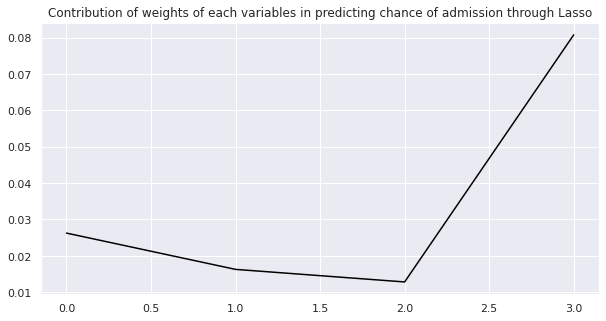

In [41]:
x_ticks = list(x)
y_ticks = list(laso.coef_)
plt.figure(figsize=(10,5))
plt.plot(laso.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Lasso')
print({'1':'GRE score','2':'TOEFL score','3':'University Rating','4':'CGPA'})
plt.show()

- Observations:
  - CGPA claims the highest Weightage in coeffieints among all variable during Lasso Regression.

# LINEAR REGRESSION ASSUMPTIONS TESTING

### Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)

In [42]:
x1 = np.array(x)
vif = []
for i in range(x1.shape[1]):
  vif.append(round(variance_inflation_factor(x1, i),2))
vif_score= pd.DataFrame({'Columns':['GRE_score', 'TOEFL_score', 'University_rating', 'CGPA'],
  'VIF score':vif})

In [43]:
vif_score

,Columns,VIF score
0,GRE_score,4.09
1,TOEFL_score,3.86
2,University_rating,2.07
3,CGPA,4.25


- Observation:
  - It can be observed that every column has a VIF less than 5.

Hense, there is no multicollinearity among the independent variables

### The mean of residuals is nearly zero

In [44]:
normal = y_test - y_pred
print('Mean of Residuals:',(sum(np.array(normal)/len(normal))))

Mean of Residuals: -0.004481807137547531


### Linearity of variables (no pattern in the residual plot)

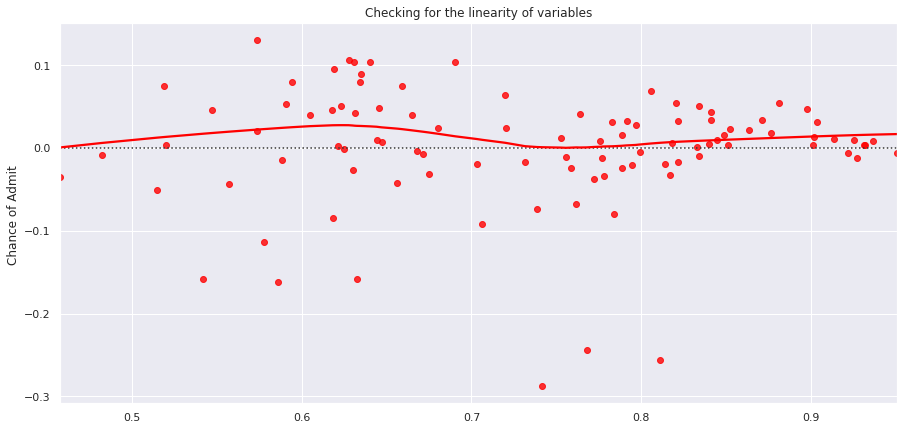

In [45]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_pred,y=normal,lowess=True,color='red')
plt.title('Checking for the linearity of variables')
plt.show()

No linearity of Variable can be observed.

### Test for Homoscedasticity

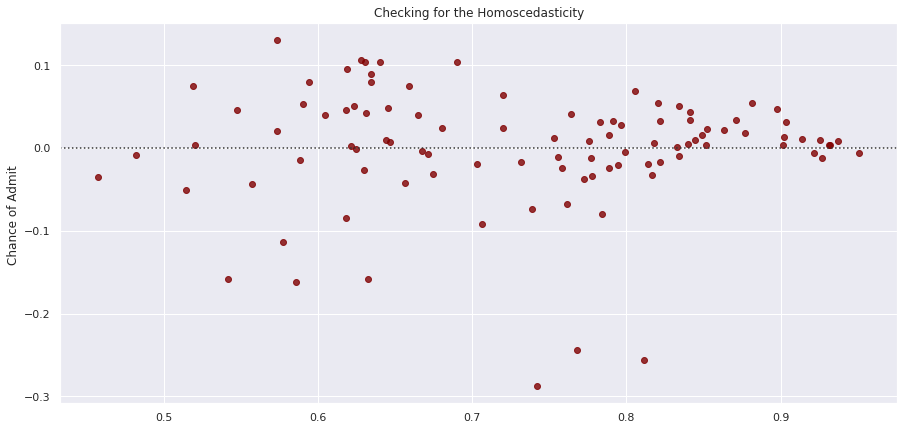

In [46]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_pred,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show()

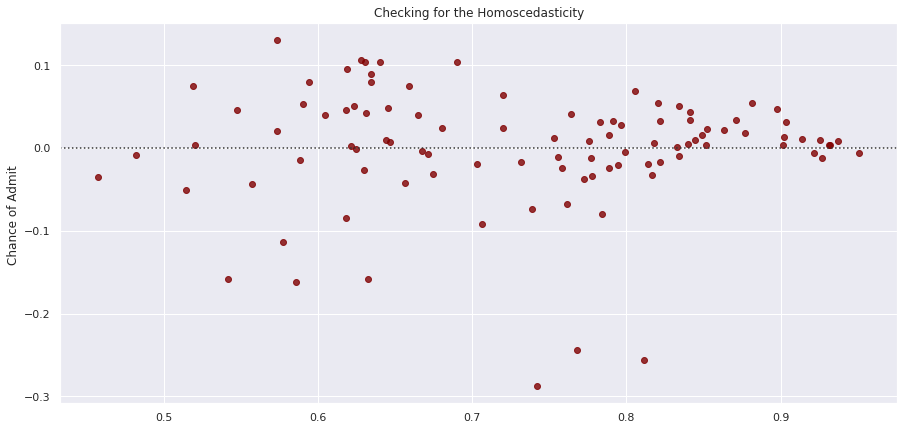

In [47]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_pred,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show()

### Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)

In [48]:
normal = y_test - y_pred
normal.head()

Serial No.
422   -0.024692
364    0.044367
152    0.042475
122    0.003059
457   -0.047162
Name: Chance of Admit , dtype: float64

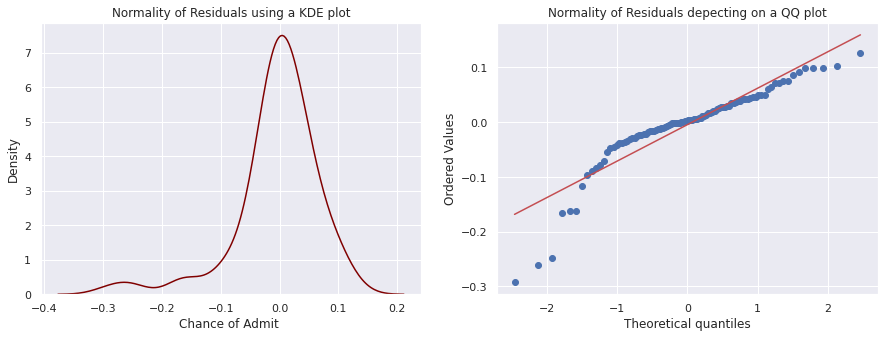

In [49]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')
ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

## __INSIGHTS__
- No outliers can be seen in the dataset.
- TOEFL Score and GRE Score shares the charactersitics of Gaussin Distribution.
- CGPA depicts a Gaussin Distribution(in kde plot)
- GRE Score and TOEFL Scores shares a high correlation.
- GRE Score and CGPA Scores shares a high correlation.
- Maximum number of students doing research received a University Rating of 3.
- University Ratings 1 and 2 only have more students doing Reseach than non-Researchers.
- Non-Research increases till University Rating 3 and then declines.
- Multiple Outliers can be noticed as the Chance of Admit increses with increase in SOP.
- High correlation can be seen between Chance of Admit and GRE Score.
- Strong correlation can be seen between CGPA and Chance of Admit.
- High correlation can be seen between TOEFL and Chance of Admit.
- High correlation can be seen between CGPA and TOEFL Score.
- High correlation can be seen between University Rating and CGPA.
- High correlation can be seen between University Rating and SOP.
- CGPA increases with University rating.
- The median of CGPA increases as increase in University Rating.
- Few outliers can be located.


## __RECOMMENDATIONS__
- Jamboree must focus on increasing the CGPA of students as it holds the maximum weightage in the model.
- Regulr feedback needed for the improvments 
- GRE scores and TOEFL Scores plays a very important role in getting the Admission.
- Jamboree must revised the learning pattern of the insitute to gain better results than last year